# Analisis de ventas


In [1]:
import os
import pandas as pd

## consolidar datos de todo el año

In [2]:
path = 'Sales_Data'
os.listdir(path)

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [3]:
path = 'Sales_Data'
archivos = [file for file in os.listdir(path) if not file.startswith('.') or not file.endswith('.txt')]
print(archivos)
data_anual = pd.DataFrame()

for archivo in archivos:
    actual = pd.read_csv(path + '/' + archivo)
    data_anual = pd.concat([data_anual, actual])

data_anual.to_csv('consolidado_2019.csv', index=False)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [4]:
data_anual.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [ ]:
data_anual.head()

## Limpieza de los datos

In [ ]:
# borrar filas vacias
nan_df = data_anual[data_anual.isna().any(axis=1)]
nan_df.shape


In [5]:
data_anual = data_anual.dropna(how='all')

In [ ]:
nan_df2 = data_anual[data_anual.isna().any(axis=1)]
nan_df2.shape

In [6]:
data_anual = data_anual[data_anual['Order Date'].str[0:2] != 'Or']
data_anual.shape


(185950, 6)

### convertir datos numericos


In [7]:
type(data_anual['Price Each'][0].values[0])

str

In [8]:
data_anual['Quantity Ordered'] = pd.to_numeric(data_anual['Quantity Ordered'])
data_anual['Price Each'] = pd.to_numeric(data_anual['Price Each'])

In [9]:
type(data_anual['Price Each'][0].values[0])

numpy.float64

### agregar columna de mes

In [10]:
data_anual['Month'] = pd.to_numeric(data_anual['Order Date'].str[:2])
data_anual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [11]:
def get_ciudad(direccion):
    return direccion.split(',')[1].strip(' ')
def get_estado(direccion):
    return direccion.split(',')[2].split(' ')[1]

In [12]:
get_ciudad('669 Spruce St, Los Angeles, CA 90001')

'Los Angeles'

In [13]:
data_anual['City'] = data_anual['Purchase Address'].apply(get_ciudad)
data_anual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles


## Exploracion de datos


### cual fue el mejor mes en ventas

In [14]:
data_anual['Sales'] = data_anual['Quantity Ordered'].astype('int') * data_anual['Price Each'].astype('float')
data_anual.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99


In [15]:
data_anual.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


Text(0.5, 1.0, 'Ventas por mes')

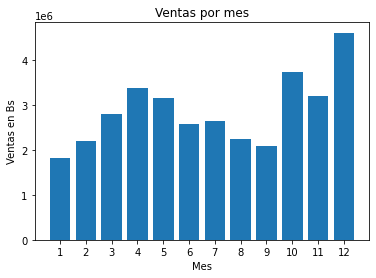

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
months = range(1,13)

plt.bar(months, data_anual.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Ventas en Bs')
plt.xlabel('Mes')
plt.title('Ventas por mes')


### cual es la ciudad con mas ventas?


In [17]:
data_anual.groupby(['City']).sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


Text(0.5, 0, 'Ciudad')

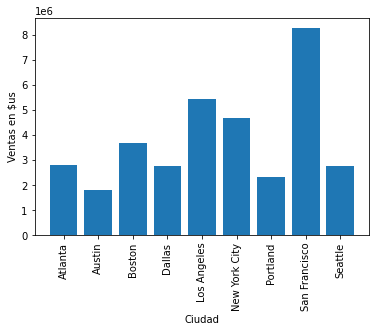

In [18]:
ciudades = [ciudad for ciudad, df in data_anual.groupby(['City'])]
plt.bar(ciudades, data_anual.groupby(['City']).sum()['Sales'])
plt.xticks(ciudades, rotation='vertical')
plt.ylabel('Ventas en $us')
plt.xlabel('Ciudad')

### a que hora deberiamos mostrar publicidad para mejorar nuestras ventas?

In [21]:
from datetime import datetime
ahora = datetime.now()
ahora.day

12

In [23]:
data_anual['Hour'] = pd.to_datetime(data_anual['Order Date']).dt.hour
data_anual.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,8.97,20
11682,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,700.00,16
11683,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,700.00,7
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,379.99,17
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",9,San Francisco,11.95,0


In [24]:
data_anual['Count'] = 1
data_anual.head(15)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,23.90,8,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,99.99,22,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,600.00,14,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,11.99,14,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,11.99,9,1
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,San Francisco,11.95,13,1
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,Seattle,99.99,7,1
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,Atlanta,11.95,10,1
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,San Francisco,1700.00,10,1
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,Boston,11.99,14,1


In [25]:
data_anual.groupby(['Hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Count
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


Text(0.5, 0, 'Hora')

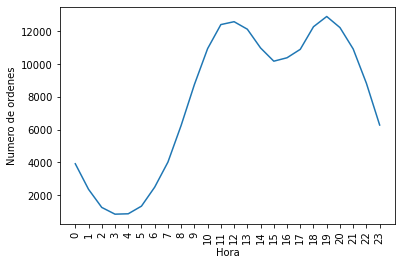

In [26]:
horas = [hora for hora, df in data_anual.groupby(['Hour'])]
plt.plot(horas, data_anual.groupby(['Hour']).count()['Count'])
plt.xticks(horas, rotation='vertical')
plt.ylabel('Numero de ordenes')
plt.xlabel('Hora')

### cuales son los productos que se venden mas a menudo juntos?